<a href="https://colab.research.google.com/github/estmon98/Anomaly-Detection/blob/main/Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
#Librerias
import unicodedata
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
#from scipy.misc.pilutil import imread
#from scipy.misc import imread
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
#!pip install emoji
import emoji
# Descargas
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Esteban
[nltk_data]     Montoya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Esteban
[nltk_data]     Montoya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#!pip install scipy

In [ ]:
df = pd.read_csv('Tweets 17-11.csv', header = 0, parse_dates =["created_at"], index_col ="created_at", low_memory = False)
filt = df['keyword'] == 'Bancolombia'

df = df[filt]

#df.drop_duplicates(['id_str','full_text'], keep='last',inplace = True)

In [ ]:
df.drop_duplicates(['id_str','full_text','user_screen_name'], keep='last',inplace = True)

In [ ]:
#df.set_index('created_at', inplace = True)

In [ ]:
df

,user_id_str,user_screen_name,favorite_count,retweet_count,lang,user_followers_count,user_created_at,user_verified,full_text,id_str,...,in_reply_to_screen_name,source,user_name,user_statuses_count,user_description,user_location,user_friends_count,hashtags,keyword,Process
created_at,,,,,,,,,,,,,,,,,,,,,
2020-08-21 19:15:22,1245491250301743106,AndresArboled_a,0,0,es,5.0,Wed Apr 01 23:20:54 +0000 2020,False,@Tigo_Colombia @Bancolombia @Grupo_Argos @post...,1.296889e+18,...,AndresArboled_a,Twitter Web App,@AndresArboled_a,33.0,?El futuro lo construimos todos.,Colombia,12.0,[],Bancolombia,Bancos
2020-08-21 14:05:37,1245491250301743106,AndresArboled_a,0,0,es,5.0,Wed Apr 01 23:20:54 +0000 2020,False,@Tigo_Colombia @Bancolombia @Grupo_Argos @post...,1.296811e+18,...,AndresArboled_a,Twitter Web App,@AndresArboled_a,33.0,?El futuro lo construimos todos.,Colombia,12.0,[],Bancolombia,Bancos
2020-08-17 17:40:01,318113083,Sexcriminals69,2,0,es,3931.0,Thu Jun 16 00:18:50 +0000 2011,False,Juega el día 17 de Septiembre del 2020 con la ...,1.295415e+18,...,Sexcriminals69,Twitter for Android,@Sexcriminals69,2232.0,"Somos una tienda erótica ubicada en Yumbo, que...","Yumbo, Colombia",247.0,[],Bancolombia,Bancos
2020-08-21 20:54:51,81288661,Alex4ero,0,3,es,667.0,Sat Oct 10 05:28:50 +0000 2009,False,RT @grand_lili: Datos de la veterinaria Lovet ...,1.296914e+18,...,NaN,Twitter for Android,Alexander Forero,37268.0,Psicología Universidad Nacional de Colombia.,Bogota,1934.0,[],Bancolombia,Bancos
2020-08-21 20:52:59,1387339154,Khrissou,0,3,es,80.0,Sun Apr 28 16:25:43 +0000 2013,False,RT @grand_lili: Datos de la veterinaria Lovet ...,1.296913e+18,...,NaN,Twitter Web App,Cristian,15894.0,NaN,NaN,805.0,[],Bancolombia,Bancos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17 18:06:27,371910296,alejomm45,0,0,es,26.0,Sun Sep 11 19:07:20 +0000 2011,False,"@Bancolombia me respondiendo cada media hora,...",1.328761e+18,...,Bancolombia,Twitter Web App,Alejandro Moreno,52.0,?? - ??‍♂️⚓ \n\nEst. Lic. Ciencias Sociales ⚓?,medellin,152.0,[],Bancolombia,Bancos
2020-11-17 18:05:44,1320897884620029952,arco_juande,0,21,es,123.0,Tue Oct 27 01:19:44 +0000 2020,False,RT @MVNaraCartagena #ColombiaHeroica Si estas ...,1.328761e+18,...,None,Twitter for Android,JuandeArco,10.0,trabajo en la ciudad de Cali con el estado me ...,NaN,1431.0,"[{'text': 'ColombiaHeroica', 'indices': [21, 3...",Bancolombia,Bancos
2020-11-17 18:04:11,48014813,Bancolombia,0,0,es,351191.0,Wed Jun 17 16:23:17 +0000 2009,True,@gonzalootavo_ ¡Hola Gonzalo! Gracias por escr...,1.328761e+18,...,gonzalootavo_,BancolombiaEP3,Bancolombia,244244.0,Entendemos tus necesidades en esta coyuntura. ...,Todos los días 6 am - 10 pm,48763.0,[],Bancolombia,Bancos


In [ ]:
df2 = df.loc['2020-11-10 18:00:00':'2020-11-15 18:15:00',['full_text']]


In [ ]:
df2

,full_text
created_at,
2020-11-10 18:04:31,.@SFCsupervisor el servicio financiero .@Nequi...
2020-11-10 18:00:52,"Las tarjetas de crédito, además de servir para..."
2020-11-10 18:00:47,"@oscaramuza ¡Hola Oscar! Te cuento, en el mome..."
2020-11-10 19:09:56,@solochip ¡Hola! Muchas gracias por la informa...
2020-11-10 19:09:08,@Bancolombia @oscaramuza https://t.co/b9lQmDGtwf
...,...
2020-11-14 01:02:01,El Grupo Bancolombia es el banco más sostenibl...
2020-11-14 01:01:45,@Amilmarith Te enviamos al DM ya que es necesa...
2020-11-14 01:01:45,@Osyegaoc ¡Hola! Desde nuestras Redes Sociales...


In [ ]:
def process_cols(df3):
    #df3=df2.loc[:,['full_text']]
    df3['Parsed_1'] = df3.loc[:,'full_text'].str.replace("\r", " ")
    df3['Parsed_1'] = df3['Parsed_1'].str.replace("\n", " ")
    df3['Parsed_1'] = df3['Parsed_1'].str.replace("/", " ")
    df3['Parsed_1'] = df3['Parsed_1'].str.replace("    ", " ")
    df3['Parsed_1'] = df3['Parsed_1'].str.replace("   ", " ")
    df3['Parsed_1'] = df3['Parsed_1'].str.replace("  ", " ")
    df3['Parsed_1'] = df3['Parsed_1'].str.replace(" +", " ")
    df3['Parsed_1'] = df3['Parsed_1'].str.replace("  +", " ")
    df3['Parsed_1'] = df3['Parsed_1'].str.replace('"', '')
    df3['Parsed_1'] = df3['Parsed_1'].str.replace('RT', '')
    df3['Parsed_1'] = df3['Parsed_1'].str.replace(r'http\S+', '')
    df3['Parsed_1'] = df3['Parsed_1'].str.replace(r'\b\w{1,2}\b', '')
   # df3['Parsed_1'] = df3['Parsed_1'].str.replace('@', '')

    # Upercase/Downcase

    df3['Parsed_2'] = df3['Parsed_1'].str.lower()

    # Signos de puntuacion
    #punctuation_signs = list("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")

    punctuation_signs = list('.,;:%@¡!¿?()$&#+-[0-9]')
    df3['Parsed_3'] = df3['Parsed_2']

    for punct_sign in punctuation_signs:
        df3['Parsed_3'] = df3['Parsed_3'].str.replace(punct_sign, '')

    # Acentos

    replacer = {u'á':'a', u'é':'e', u'í':'i', u'ó':'o', u'ú|ü':'u', u'Á':'A', u'É':'E', u'Í':'I', u'Ó':'O', u'Ú|Ü':'U', u'ñ':'n', u'Ñ':'N'}
    df3['Parsed_4'] = df3['Parsed_3']

    for k, v in replacer.items():
        df3['Parsed_4'] = df3['Parsed_4'].str.replace(k,v)

    df3=df3[df3['Parsed_4'].isnull()==False]
    words = ' '.join(df3['Parsed_4'])

    return unicodedata.normalize('NFKD', words).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [ ]:
stopword_list = set(stopwords.words('spanish'))
wordsFiltered = ['bancolombia','hola','mas','estan','co','son','va','sin','por','para','ustedes','hacen']
STOPWORDS = stopword_list.union(set(wordsFiltered))
#sin de que  https por y no ella para hola a tu en la te mi su me los con un es las se nos al el esta este fue está ha he habido del de sus ese su le una o como ud da pero ya

In [ ]:
STOPWORDS

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'bancolombia',
 'co',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estan',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis'

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=10,
        max_font_size=100,
        scale=5,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
   # return wordcloud

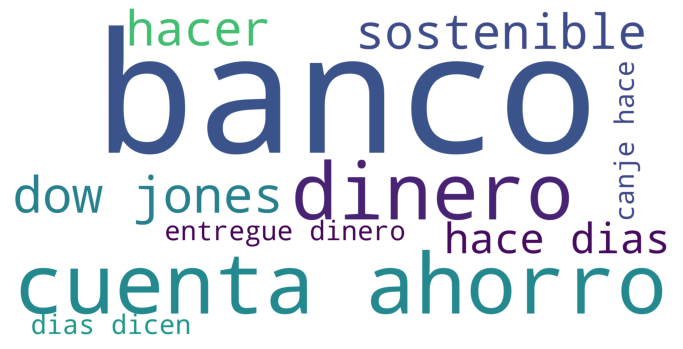

In [ ]:
words = process_cols(df2)
wordcloud= show_wordcloud(words)


In [ ]:
words

"sfcsupervisor  servicio financiero nequi  rechaza como usuario sin explicacion alguna soy cuentahabiente  bancolombia por muchos anos aplican ciudadania selectiva   v2d3ced4zw las tarjetas  credito ademas  servir para financiar necesidades  consumo son  gran universo   oferta  productos del sector los invito  ver  cristina arrastia vicepresidenta  negocios  bancolombia hablando sobre sus beneficios    mrr3conbj   jilnq3ci5 oscaramuza hola oscar  cuento   momento  presentamos inconvenientes reportados con  app personas  invitamos  escribirnos por medio del  con  finalidad  validar  caso  brindarte asesoria  respecto saludosandrea solochip hola muchas gracias por  informacion  mismo hacemos  reporte del cajero una vez tengamos alguna novedad   haremos saber saludos mile bancolombia oscaramuza   blqmdgtwf hoy  desbloquearon  cta bancolombia hasta con  dinero   transaccion que hizo que   bloqueara mellamanhydro hola que error  aparece  tratar  utilizarla ven   saludos mile piconprado wint

In [ ]:
from collections import Counter


In [ ]:
text_freq = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=10,
        max_font_size=100,
        scale=5,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).process_text(str(words))
text_freq

{'sfcsupervisor': 180,
 'servicio': 87,
 'financiero': 7,
 'nequi': 98,
 'rechaza': 2,
 'usuario': 56,
 'explicacion': 4,
 'alguna': 23,
 'cuentahabiente': 1,
 'aplican': 2,
 'ciudadania': 1,
 'selectiva': 1,
 'v2d3ced4zw': 1,
 'credito': 13,
 'gran': 15,
 'sector': 25,
 'invito': 6,
 'ver': 15,
 'hablando': 31,
 'mrr3conbj': 1,
 'jilnq3ci5': 1,
 'oscaramuza': 2,
 'oscar': 1,
 'cuento': 14,
 'momento': 13,
 'app': 176,
 'invitamos': 77,
 'escribirnos': 28,
 'medio': 91,
 'finalidad': 5,
 'validar': 31,
 'caso': 25,
 'brindarte': 29,
 'respecto': 24,
 'saludosandrea': 3,
 'solochip': 2,
 'informacion': 119,
 'mismo': 91,
 'hacemos': 6,
 'reporte': 16,
 'cajero': 118,
 'vez': 16,
 'novedad': 5,
 'haremos': 5,
 'saber': 29,
 'mile': 7,
 'blqmdgtwf': 1,
 'hoy': 54,
 'desbloquearon': 1,
 'cta': 5,
 'dinero': 382,
 'transaccion': 44,
 'hizo': 16,
 'bloqueara': 1,
 'mellamanhydro': 2,
 'error': 26,
 'aparece': 19,
 'tratar': 5,
 'utilizarla': 1,
 'ven': 75,
 'piconprado': 44,
 'wintorabc': 39

In [ ]:
k = Counter(text_freq)
k

Counter({'sfcsupervisor': 180,
         'servicio': 87,
         'financiero': 7,
         'nequi': 98,
         'rechaza': 2,
         'usuario': 56,
         'explicacion': 4,
         'alguna': 23,
         'cuentahabiente': 1,
         'aplican': 2,
         'ciudadania': 1,
         'selectiva': 1,
         'v2d3ced4zw': 1,
         'credito': 13,
         'gran': 15,
         'sector': 25,
         'invito': 6,
         'ver': 15,
         'hablando': 31,
         'mrr3conbj': 1,
         'jilnq3ci5': 1,
         'oscaramuza': 2,
         'oscar': 1,
         'cuento': 14,
         'momento': 13,
         'app': 176,
         'invitamos': 77,
         'escribirnos': 28,
         'medio': 91,
         'finalidad': 5,
         'validar': 31,
         'caso': 25,
         'brindarte': 29,
         'respecto': 24,
         'saludosandrea': 3,
         'solochip': 2,
         'informacion': 119,
         'mismo': 91,
         'hacemos': 6,
         'reporte': 16,
         'cajero': 11

In [ ]:
k.most_common(20)

[('banco', 534),
 ('cuenta ahorro', 442),
 ('dinero', 382),
 ('dow jones', 326),
 ('hacer', 294),
 ('sostenible', 291),
 ('hace dias', 236),
 ('entregue dinero', 228),
 ('canje hace', 228),
 ('dias dicen', 228),
 ('verificando procedencia', 228),
 ('lavando plata', 228),
 ('plata haria', 228),
 ('controla sfcsupervisor', 228),
 ('evitachete', 208),
 ('clave dinamica', 189),
 ('sfcsupervisor', 180),
 ('favor', 178),
 ('app', 176),
 ('sura argos', 172)]

In [ ]:
df2

,full_text,Parsed_1,Parsed_2,Parsed_3,Parsed_4
created_at,,,,,
2020-11-10 18:04:31,.@SFCsupervisor el servicio financiero .@Nequi...,.@SFCsupervisor servicio financiero .@Nequi ...,.@sfcsupervisor servicio financiero .@nequi ...,sfcsupervisor servicio financiero nequi rech...,sfcsupervisor servicio financiero nequi rech...
2020-11-10 18:00:52,"Las tarjetas de crédito, además de servir para...","Las tarjetas crédito, además servir para fin...","las tarjetas crédito, además servir para fin...",las tarjetas crédito además servir para fina...,las tarjetas credito ademas servir para fina...
2020-11-10 18:00:47,"@oscaramuza ¡Hola Oscar! Te cuento, en el mome...","@oscaramuza ¡Hola Oscar! cuento, momento p...","@oscaramuza ¡hola oscar! cuento, momento p...",oscaramuza hola oscar cuento momento prese...,oscaramuza hola oscar cuento momento prese...
2020-11-10 19:09:56,@solochip ¡Hola! Muchas gracias por la informa...,@solochip ¡Hola! Muchas gracias por informaci...,@solochip ¡hola! muchas gracias por informaci...,solochip hola muchas gracias por información ...,solochip hola muchas gracias por informacion ...
2020-11-10 19:09:08,@Bancolombia @oscaramuza https://t.co/b9lQmDGtwf,@Bancolombia @oscaramuza . b9lQmDGtwf,@bancolombia @oscaramuza . b9lqmdgtwf,bancolombia oscaramuza blqmdgtwf,bancolombia oscaramuza blqmdgtwf
...,...,...,...,...,...
2020-11-14 01:02:01,El Grupo Bancolombia es el banco más sostenibl...,Grupo Bancolombia banco más sostenible del ...,grupo bancolombia banco más sostenible del ...,grupo bancolombia banco más sostenible del ...,grupo bancolombia banco mas sostenible del ...
2020-11-14 01:01:45,@Amilmarith Te enviamos al DM ya que es necesa...,@Amilmarith enviamos que necesario pedirt...,@amilmarith enviamos que necesario pedirt...,amilmarith enviamos que necesario pedirte...,amilmarith enviamos que necesario pedirte...
2020-11-14 01:01:45,@Osyegaoc ¡Hola! Desde nuestras Redes Sociales...,@Osyegaoc ¡Hola! Desde nuestras Redes Sociales...,@osyegaoc ¡hola! desde nuestras redes sociales...,osyegaoc hola desde nuestras redes sociales es...,osyegaoc hola desde nuestras redes sociales es...


In [ ]:
# df.index[0]
# step=datetime.timedelta(minutes=15)

# while df.index[0] < df.index[-1]:
#     for i in df.index


In [ ]:
df_a = pd.read_csv('Cluster_Det_Anomal.csv')
df_a['created_at'] = pd.to_datetime(df_a['created_at'])
df_a

,created_at,# Tweets,is_retweet,Label,Score,Cumulative Label
0,2020-08-13 07:45:00,2.0,1,0,3.082019,0.0
1,2020-08-13 08:00:00,1.0,1,0,3.920002,0.0
2,2020-08-13 08:15:00,0.0,0,0,5.083705,0.0
3,2020-08-13 08:30:00,2.0,1,0,3.083029,0.0
4,2020-08-13 08:45:00,0.0,0,0,5.083705,0.0
...,...,...,...,...,...,...
10144,2020-11-26 23:45:00,42.0,6,0,15.742468,3.0
10145,2020-11-27 00:00:00,38.0,6,0,11.988146,2.0
10146,2020-11-27 00:15:00,22.0,10,0,5.265445,1.0
10147,2020-11-27 00:30:00,18.0,11,0,8.603349,0.0


In [ ]:
df_a['created_at'] = pd.to_datetime(df_a['created_at'])

In [ ]:
for i in df_a.index :
    print(df_a['created_at'].iloc[i])

2020-08-13 07:45:00
2020-08-13 08:00:00
2020-08-13 08:15:00
2020-08-13 08:30:00
2020-08-13 08:45:00
2020-08-13 09:00:00
2020-08-13 09:15:00
2020-08-13 09:30:00
2020-08-13 09:45:00
2020-08-13 10:00:00
2020-08-13 10:15:00
2020-08-13 10:30:00
2020-08-13 10:45:00
2020-08-13 11:00:00
2020-08-13 11:15:00
2020-08-13 11:30:00
2020-08-13 11:45:00
2020-08-13 12:00:00
2020-08-13 12:15:00
2020-08-13 12:30:00
2020-08-13 12:45:00
2020-08-13 13:00:00
2020-08-13 13:15:00
2020-08-13 13:30:00
2020-08-13 13:45:00
2020-08-13 14:00:00
2020-08-13 14:15:00
2020-08-13 14:30:00
2020-08-13 14:45:00
2020-08-13 15:00:00
2020-08-13 15:15:00
2020-08-13 15:30:00
2020-08-13 15:45:00
2020-08-13 16:00:00
2020-08-13 16:15:00
2020-08-13 16:30:00
2020-08-13 16:45:00
2020-08-13 17:00:00
2020-08-13 17:15:00
2020-08-13 17:30:00
2020-08-13 17:45:00
2020-08-13 18:00:00
2020-08-13 18:15:00
2020-08-13 18:30:00
2020-08-13 18:45:00
2020-08-13 19:00:00
2020-08-13 19:15:00
2020-08-13 19:30:00
2020-08-13 19:45:00
2020-08-13 20:00:00


2020-08-22 00:30:00
2020-08-22 00:45:00
2020-08-22 01:00:00
2020-08-22 01:15:00
2020-08-22 01:30:00
2020-08-22 01:45:00
2020-08-22 02:00:00
2020-08-22 02:15:00
2020-08-22 02:30:00
2020-08-22 02:45:00
2020-08-22 03:00:00
2020-08-22 03:15:00
2020-08-22 03:30:00
2020-08-22 03:45:00
2020-08-22 04:00:00
2020-08-22 04:15:00
2020-08-22 04:30:00
2020-08-22 04:45:00
2020-08-22 05:00:00
2020-08-22 05:15:00
2020-08-22 05:30:00
2020-08-22 05:45:00
2020-08-22 06:00:00
2020-08-22 06:15:00
2020-08-22 06:30:00
2020-08-22 06:45:00
2020-08-22 07:00:00
2020-08-22 07:15:00
2020-08-22 07:30:00
2020-08-22 07:45:00
2020-08-22 08:00:00
2020-08-22 08:15:00
2020-08-22 08:30:00
2020-08-22 08:45:00
2020-08-22 09:00:00
2020-08-22 09:15:00
2020-08-22 09:30:00
2020-08-22 09:45:00
2020-08-22 10:00:00
2020-08-22 10:15:00
2020-08-22 10:30:00
2020-08-22 10:45:00
2020-08-22 11:00:00
2020-08-22 11:15:00
2020-08-22 11:30:00
2020-08-22 11:45:00
2020-08-22 12:00:00
2020-08-22 12:15:00
2020-08-22 12:30:00
2020-08-22 12:45:00


2020-08-29 15:45:00
2020-08-29 16:00:00
2020-08-29 16:15:00
2020-08-29 16:30:00
2020-08-29 16:45:00
2020-08-29 17:00:00
2020-08-29 17:15:00
2020-08-29 17:30:00
2020-08-29 17:45:00
2020-08-29 18:00:00
2020-08-29 18:15:00
2020-08-29 18:30:00
2020-08-29 18:45:00
2020-08-29 19:00:00
2020-08-29 19:15:00
2020-08-29 19:30:00
2020-08-29 19:45:00
2020-08-29 20:00:00
2020-08-29 20:15:00
2020-08-29 20:30:00
2020-08-29 20:45:00
2020-08-29 21:00:00
2020-08-29 21:15:00
2020-08-29 21:30:00
2020-08-29 21:45:00
2020-08-29 22:00:00
2020-08-29 22:15:00
2020-08-29 22:30:00
2020-08-29 22:45:00
2020-08-29 23:00:00
2020-08-29 23:15:00
2020-08-29 23:30:00
2020-08-29 23:45:00
2020-08-30 00:00:00
2020-08-30 00:15:00
2020-08-30 00:30:00
2020-08-30 00:45:00
2020-08-30 01:00:00
2020-08-30 01:15:00
2020-08-30 01:30:00
2020-08-30 01:45:00
2020-08-30 02:00:00
2020-08-30 02:15:00
2020-08-30 02:30:00
2020-08-30 02:45:00
2020-08-30 03:00:00
2020-08-30 03:15:00
2020-08-30 03:30:00
2020-08-30 03:45:00
2020-08-30 04:00:00


2020-09-06 15:15:00
2020-09-06 15:30:00
2020-09-06 15:45:00
2020-09-06 16:00:00
2020-09-06 16:15:00
2020-09-06 16:30:00
2020-09-06 16:45:00
2020-09-06 17:00:00
2020-09-06 17:15:00
2020-09-06 17:30:00
2020-09-06 17:45:00
2020-09-06 18:00:00
2020-09-06 18:15:00
2020-09-06 18:30:00
2020-09-06 18:45:00
2020-09-06 19:00:00
2020-09-06 19:15:00
2020-09-06 19:30:00
2020-09-06 19:45:00
2020-09-06 20:00:00
2020-09-06 20:15:00
2020-09-06 20:30:00
2020-09-06 20:45:00
2020-09-06 21:00:00
2020-09-06 21:15:00
2020-09-06 21:30:00
2020-09-06 21:45:00
2020-09-06 22:00:00
2020-09-06 22:15:00
2020-09-06 22:30:00
2020-09-06 22:45:00
2020-09-06 23:00:00
2020-09-06 23:15:00
2020-09-06 23:30:00
2020-09-06 23:45:00
2020-09-07 00:00:00
2020-09-07 00:15:00
2020-09-07 00:30:00
2020-09-07 00:45:00
2020-09-07 01:00:00
2020-09-07 01:15:00
2020-09-07 01:30:00
2020-09-07 01:45:00
2020-09-07 02:00:00
2020-09-07 02:15:00
2020-09-07 02:30:00
2020-09-07 02:45:00
2020-09-07 03:00:00
2020-09-07 03:15:00
2020-09-07 03:30:00


2020-09-11 22:30:00
2020-09-11 22:45:00
2020-09-11 23:00:00
2020-09-11 23:15:00
2020-09-11 23:30:00
2020-09-11 23:45:00
2020-09-12 00:00:00
2020-09-12 00:15:00
2020-09-12 00:30:00
2020-09-12 00:45:00
2020-09-12 01:00:00
2020-09-12 01:15:00
2020-09-12 01:30:00
2020-09-12 01:45:00
2020-09-12 02:00:00
2020-09-12 02:15:00
2020-09-12 02:30:00
2020-09-12 02:45:00
2020-09-12 03:00:00
2020-09-12 03:15:00
2020-09-12 03:30:00
2020-09-12 03:45:00
2020-09-12 04:00:00
2020-09-12 04:15:00
2020-09-12 04:30:00
2020-09-12 04:45:00
2020-09-12 05:00:00
2020-09-12 05:15:00
2020-09-12 05:30:00
2020-09-12 05:45:00
2020-09-12 06:00:00
2020-09-12 06:15:00
2020-09-12 06:30:00
2020-09-12 06:45:00
2020-09-12 07:00:00
2020-09-12 07:15:00
2020-09-12 07:30:00
2020-09-12 07:45:00
2020-09-12 08:00:00
2020-09-12 08:15:00
2020-09-12 08:30:00
2020-09-12 08:45:00
2020-09-12 09:00:00
2020-09-12 09:15:00
2020-09-12 09:30:00
2020-09-12 09:45:00
2020-09-12 10:00:00
2020-09-12 10:15:00
2020-09-12 10:30:00
2020-09-12 10:45:00


2020-09-19 15:00:00
2020-09-19 15:15:00
2020-09-19 15:30:00
2020-09-19 15:45:00
2020-09-19 16:00:00
2020-09-19 16:15:00
2020-09-19 16:30:00
2020-09-19 16:45:00
2020-09-19 17:00:00
2020-09-19 17:15:00
2020-09-19 17:30:00
2020-09-19 17:45:00
2020-09-19 18:00:00
2020-09-19 18:15:00
2020-09-19 18:30:00
2020-09-19 18:45:00
2020-09-19 19:00:00
2020-09-19 19:15:00
2020-09-19 19:30:00
2020-09-19 19:45:00
2020-09-19 20:00:00
2020-09-19 20:15:00
2020-09-19 20:30:00
2020-09-19 20:45:00
2020-09-19 21:00:00
2020-09-19 21:15:00
2020-09-19 21:30:00
2020-09-19 21:45:00
2020-09-19 22:00:00
2020-09-19 22:15:00
2020-09-19 22:30:00
2020-09-19 22:45:00
2020-09-19 23:00:00
2020-09-19 23:15:00
2020-09-19 23:30:00
2020-09-19 23:45:00
2020-09-20 00:00:00
2020-09-20 00:15:00
2020-09-20 00:30:00
2020-09-20 00:45:00
2020-09-20 01:00:00
2020-09-20 01:15:00
2020-09-20 01:30:00
2020-09-20 01:45:00
2020-09-20 02:00:00
2020-09-20 02:15:00
2020-09-20 02:30:00
2020-09-20 02:45:00
2020-09-20 03:00:00
2020-09-20 03:15:00


2020-09-27 11:00:00
2020-09-27 11:15:00
2020-09-27 11:30:00
2020-09-27 11:45:00
2020-09-27 12:00:00
2020-09-27 12:15:00
2020-09-27 12:30:00
2020-09-27 12:45:00
2020-09-27 13:00:00
2020-09-27 13:15:00
2020-09-27 13:30:00
2020-09-27 13:45:00
2020-09-27 14:00:00
2020-09-27 14:15:00
2020-09-27 14:30:00
2020-09-27 14:45:00
2020-09-27 15:00:00
2020-09-27 15:15:00
2020-09-27 15:30:00
2020-09-27 15:45:00
2020-09-27 16:00:00
2020-09-27 16:15:00
2020-09-27 16:30:00
2020-09-27 16:45:00
2020-09-27 17:00:00
2020-09-27 17:15:00
2020-09-27 17:30:00
2020-09-27 17:45:00
2020-09-27 18:00:00
2020-09-27 18:15:00
2020-09-27 18:30:00
2020-09-27 18:45:00
2020-09-27 19:00:00
2020-09-27 19:15:00
2020-09-27 19:30:00
2020-09-27 19:45:00
2020-09-27 20:00:00
2020-09-27 20:15:00
2020-09-27 20:30:00
2020-09-27 20:45:00
2020-09-27 21:00:00
2020-09-27 21:15:00
2020-09-27 21:30:00
2020-09-27 21:45:00
2020-09-27 22:00:00
2020-09-27 22:15:00
2020-09-27 22:30:00
2020-09-27 22:45:00
2020-09-27 23:00:00
2020-09-27 23:15:00


2020-10-05 13:15:00
2020-10-05 13:30:00
2020-10-05 13:45:00
2020-10-05 14:00:00
2020-10-05 14:15:00
2020-10-05 14:30:00
2020-10-05 14:45:00
2020-10-05 15:00:00
2020-10-05 15:15:00
2020-10-05 15:30:00
2020-10-05 15:45:00
2020-10-05 16:00:00
2020-10-05 16:15:00
2020-10-05 16:30:00
2020-10-05 16:45:00
2020-10-05 17:00:00
2020-10-05 17:15:00
2020-10-05 17:30:00
2020-10-05 17:45:00
2020-10-05 18:00:00
2020-10-05 18:15:00
2020-10-05 18:30:00
2020-10-05 18:45:00
2020-10-05 19:00:00
2020-10-05 19:15:00
2020-10-05 19:30:00
2020-10-05 19:45:00
2020-10-05 20:00:00
2020-10-05 20:15:00
2020-10-05 20:30:00
2020-10-05 20:45:00
2020-10-05 21:00:00
2020-10-05 21:15:00
2020-10-05 21:30:00
2020-10-05 21:45:00
2020-10-05 22:00:00
2020-10-05 22:15:00
2020-10-05 22:30:00
2020-10-05 22:45:00
2020-10-05 23:00:00
2020-10-05 23:15:00
2020-10-05 23:30:00
2020-10-05 23:45:00
2020-10-06 00:00:00
2020-10-06 00:15:00
2020-10-06 00:30:00
2020-10-06 00:45:00
2020-10-06 01:00:00
2020-10-06 01:15:00
2020-10-06 01:30:00


2020-10-12 06:45:00
2020-10-12 07:00:00
2020-10-12 07:15:00
2020-10-12 07:30:00
2020-10-12 07:45:00
2020-10-12 08:00:00
2020-10-12 08:15:00
2020-10-12 08:30:00
2020-10-12 08:45:00
2020-10-12 09:00:00
2020-10-12 09:15:00
2020-10-12 09:30:00
2020-10-12 09:45:00
2020-10-12 10:00:00
2020-10-12 10:15:00
2020-10-12 10:30:00
2020-10-12 10:45:00
2020-10-12 11:00:00
2020-10-12 11:15:00
2020-10-12 11:30:00
2020-10-12 11:45:00
2020-10-12 12:00:00
2020-10-12 12:15:00
2020-10-12 12:30:00
2020-10-12 12:45:00
2020-10-12 13:00:00
2020-10-12 13:15:00
2020-10-12 13:30:00
2020-10-12 13:45:00
2020-10-12 14:00:00
2020-10-12 14:15:00
2020-10-12 14:30:00
2020-10-12 14:45:00
2020-10-12 15:00:00
2020-10-12 15:15:00
2020-10-12 15:30:00
2020-10-12 15:45:00
2020-10-12 16:00:00
2020-10-12 16:15:00
2020-10-12 16:30:00
2020-10-12 16:45:00
2020-10-12 17:00:00
2020-10-12 17:15:00
2020-10-12 17:30:00
2020-10-12 17:45:00
2020-10-12 18:00:00
2020-10-12 18:15:00
2020-10-12 18:30:00
2020-10-12 18:45:00
2020-10-12 19:00:00


2020-10-20 01:00:00
2020-10-20 01:15:00
2020-10-20 01:30:00
2020-10-20 01:45:00
2020-10-20 02:00:00
2020-10-20 02:15:00
2020-10-20 02:30:00
2020-10-20 02:45:00
2020-10-20 03:00:00
2020-10-20 03:15:00
2020-10-20 03:30:00
2020-10-20 03:45:00
2020-10-20 04:00:00
2020-10-20 04:15:00
2020-10-20 04:30:00
2020-10-20 04:45:00
2020-10-20 05:00:00
2020-10-20 05:15:00
2020-10-20 05:30:00
2020-10-20 05:45:00
2020-10-20 06:00:00
2020-10-20 06:15:00
2020-10-20 06:30:00
2020-10-20 06:45:00
2020-10-20 07:00:00
2020-10-20 07:15:00
2020-10-20 07:30:00
2020-10-20 07:45:00
2020-10-20 08:00:00
2020-10-20 08:15:00
2020-10-20 08:30:00
2020-10-20 08:45:00
2020-10-20 09:00:00
2020-10-20 09:15:00
2020-10-20 09:30:00
2020-10-20 09:45:00
2020-10-20 10:00:00
2020-10-20 10:15:00
2020-10-20 10:30:00
2020-10-20 10:45:00
2020-10-20 11:00:00
2020-10-20 11:15:00
2020-10-20 11:30:00
2020-10-20 11:45:00
2020-10-20 12:00:00
2020-10-20 12:15:00
2020-10-20 12:30:00
2020-10-20 12:45:00
2020-10-20 13:00:00
2020-10-20 13:15:00


2020-10-27 08:45:00
2020-10-27 09:00:00
2020-10-27 09:15:00
2020-10-27 09:30:00
2020-10-27 09:45:00
2020-10-27 10:00:00
2020-10-27 10:15:00
2020-10-27 10:30:00
2020-10-27 10:45:00
2020-10-27 11:00:00
2020-10-27 11:15:00
2020-10-27 11:30:00
2020-10-27 11:45:00
2020-10-27 12:00:00
2020-10-27 12:15:00
2020-10-27 12:30:00
2020-10-27 12:45:00
2020-10-27 13:00:00
2020-10-27 13:15:00
2020-10-27 13:30:00
2020-10-27 13:45:00
2020-10-27 14:00:00
2020-10-27 14:15:00
2020-10-27 14:30:00
2020-10-27 14:45:00
2020-10-27 15:00:00
2020-10-27 15:15:00
2020-10-27 15:30:00
2020-10-27 15:45:00
2020-10-27 16:00:00
2020-10-27 16:15:00
2020-10-27 16:30:00
2020-10-27 16:45:00
2020-10-27 17:00:00
2020-10-27 17:15:00
2020-10-27 17:30:00
2020-10-27 17:45:00
2020-10-27 18:00:00
2020-10-27 18:15:00
2020-10-27 18:30:00
2020-10-27 18:45:00
2020-10-27 19:00:00
2020-10-27 19:15:00
2020-10-27 19:30:00
2020-10-27 19:45:00
2020-10-27 20:00:00
2020-10-27 20:15:00
2020-10-27 20:30:00
2020-10-27 20:45:00
2020-10-27 21:00:00


2020-11-03 00:00:00
2020-11-03 00:15:00
2020-11-03 00:30:00
2020-11-03 00:45:00
2020-11-03 01:00:00
2020-11-03 01:15:00
2020-11-03 01:30:00
2020-11-03 01:45:00
2020-11-03 02:00:00
2020-11-03 02:15:00
2020-11-03 02:30:00
2020-11-03 02:45:00
2020-11-03 03:00:00
2020-11-03 03:15:00
2020-11-03 03:30:00
2020-11-03 03:45:00
2020-11-03 04:00:00
2020-11-03 04:15:00
2020-11-03 04:30:00
2020-11-03 04:45:00
2020-11-03 05:00:00
2020-11-03 05:15:00
2020-11-03 05:30:00
2020-11-03 05:45:00
2020-11-03 06:00:00
2020-11-03 06:15:00
2020-11-03 06:30:00
2020-11-03 06:45:00
2020-11-03 07:00:00
2020-11-03 07:15:00
2020-11-03 07:30:00
2020-11-03 07:45:00
2020-11-03 08:00:00
2020-11-03 08:15:00
2020-11-03 08:30:00
2020-11-03 08:45:00
2020-11-03 09:00:00
2020-11-03 09:15:00
2020-11-03 09:30:00
2020-11-03 09:45:00
2020-11-03 10:00:00
2020-11-03 10:15:00
2020-11-03 10:30:00
2020-11-03 10:45:00
2020-11-03 11:00:00
2020-11-03 11:15:00
2020-11-03 11:30:00
2020-11-03 11:45:00
2020-11-03 12:00:00
2020-11-03 12:15:00


2020-11-10 06:45:00
2020-11-10 07:00:00
2020-11-10 07:15:00
2020-11-10 07:30:00
2020-11-10 07:45:00
2020-11-10 08:00:00
2020-11-10 08:15:00
2020-11-10 08:30:00
2020-11-10 08:45:00
2020-11-10 09:00:00
2020-11-10 09:15:00
2020-11-10 09:30:00
2020-11-10 09:45:00
2020-11-10 10:00:00
2020-11-10 10:15:00
2020-11-10 10:30:00
2020-11-10 10:45:00
2020-11-10 11:00:00
2020-11-10 11:15:00
2020-11-10 11:30:00
2020-11-10 11:45:00
2020-11-10 12:00:00
2020-11-10 12:15:00
2020-11-10 12:30:00
2020-11-10 12:45:00
2020-11-10 13:00:00
2020-11-10 13:15:00
2020-11-10 13:30:00
2020-11-10 13:45:00
2020-11-10 14:00:00
2020-11-10 14:15:00
2020-11-10 14:30:00
2020-11-10 14:45:00
2020-11-10 15:00:00
2020-11-10 15:15:00
2020-11-10 15:30:00
2020-11-10 15:45:00
2020-11-10 16:00:00
2020-11-10 16:15:00
2020-11-10 16:30:00
2020-11-10 16:45:00
2020-11-10 17:00:00
2020-11-10 17:15:00
2020-11-10 17:30:00
2020-11-10 17:45:00
2020-11-10 18:00:00
2020-11-10 18:15:00
2020-11-10 18:30:00
2020-11-10 18:45:00
2020-11-10 19:00:00


2020-11-16 11:45:00
2020-11-16 12:00:00
2020-11-16 12:15:00
2020-11-16 12:30:00
2020-11-16 12:45:00
2020-11-16 13:00:00
2020-11-16 13:15:00
2020-11-16 13:30:00
2020-11-16 13:45:00
2020-11-16 14:00:00
2020-11-16 14:15:00
2020-11-16 14:30:00
2020-11-16 14:45:00
2020-11-16 15:00:00
2020-11-16 15:15:00
2020-11-16 15:30:00
2020-11-16 15:45:00
2020-11-16 16:00:00
2020-11-16 16:15:00
2020-11-16 16:30:00
2020-11-16 16:45:00
2020-11-16 17:00:00
2020-11-16 17:15:00
2020-11-16 17:30:00
2020-11-16 17:45:00
2020-11-16 18:00:00
2020-11-16 18:15:00
2020-11-16 18:30:00
2020-11-16 18:45:00
2020-11-16 19:00:00
2020-11-16 19:15:00
2020-11-16 19:30:00
2020-11-16 19:45:00
2020-11-16 20:00:00
2020-11-16 20:15:00
2020-11-16 20:30:00
2020-11-16 20:45:00
2020-11-16 21:00:00
2020-11-16 21:15:00
2020-11-16 21:30:00
2020-11-16 21:45:00
2020-11-16 22:00:00
2020-11-16 22:15:00
2020-11-16 22:30:00
2020-11-16 22:45:00
2020-11-16 23:00:00
2020-11-16 23:15:00
2020-11-16 23:30:00
2020-11-16 23:45:00
2020-11-17 00:00:00


In [ ]:
df_a['created_at'].iloc[9500]


Timestamp('2020-11-20 06:45:00')

In [ ]:
df_a['created_at'].iloc[10000]

Timestamp('2020-11-25 11:45:00')

In [ ]:
len(df_a['created_at'])

10149

In [ ]:
df_a['created_at'].iloc[9500]

Timestamp('2020-11-20 06:45:00')

In [ ]:
df2 = df.loc[str(df_a['created_at'].iloc[200]):str(df_a['created_at'].iloc[10000]),['full_text']]
df2

,full_text
created_at,
2020-08-21 19:15:22,@Tigo_Colombia @Bancolombia @Grupo_Argos @post...
2020-08-21 14:05:37,@Tigo_Colombia @Bancolombia @Grupo_Argos @post...
2020-08-17 17:40:01,Juega el día 17 de Septiembre del 2020 con la ...
2020-08-21 20:54:51,RT @grand_lili: Datos de la veterinaria Lovet ...
2020-08-21 20:52:59,RT @grand_lili: Datos de la veterinaria Lovet ...
...,...
2020-11-17 18:06:27,"@Bancolombia me respondiendo cada media hora,..."
2020-11-17 18:05:44,RT @MVNaraCartagena #ColombiaHeroica Si estas ...
2020-11-17 18:04:11,@gonzalootavo_ ¡Hola Gonzalo! Gracias por escr...


In [ ]:
# for i in df_a.index :
#     i = i+1
#     #print(df_a['created_at'].iloc[i])
#     #print(i)
#     df2 = df.loc[(df_a['created_at'].iloc[i-1]):(df_a['created_at'].iloc[i]),['full_text']]

In [ ]:
df_a.index[1:3]

RangeIndex(start=1, stop=3, step=1)

In [ ]:
df2.tail(30)

,full_text
created_at,
2020-11-17 18:24:53,"@WintorAbc esto me respondio bancolombia, que ..."
2020-11-17 18:22:34,"RT @shadowplay_____ oigan, acá les dejo estas ..."
2020-11-17 18:22:19,https://t.co/Q3yle3pMjs Has tu aporte con lo q...
2020-11-17 18:22:15,"@Bancolombia Desde ninguna parte, ese pan y ci..."
2020-11-17 18:21:33,RT @BluRadioCo Estamos canalizando donaciones ...
2020-11-17 18:21:05,Estamos canalizando donaciones en especie y en...
2020-11-17 18:18:35,RT @RICHARDAGUILARV ? San Andrés Providencia \...
2020-11-17 18:18:14,RT @RICHARDAGUILARV ? San Andrés Providencia \...
2020-11-17 18:17:53,RT @RICHARDAGUILARV ? San Andrés Providencia \...


In [ ]:
df_a.index

RangeIndex(start=0, stop=10149, step=1)

In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
prueba = df_a.copy()

In [ ]:
prueba

,created_at,# Tweets,is_retweet,Label,Score,Cumulative Label
0,2020-08-13 07:45:00,2.0,1,0,3.082019,0.0
1,2020-08-13 08:00:00,1.0,1,0,3.920002,0.0
2,2020-08-13 08:15:00,0.0,0,0,5.083705,0.0
3,2020-08-13 08:30:00,2.0,1,0,3.083029,0.0
4,2020-08-13 08:45:00,0.0,0,0,5.083705,0.0
...,...,...,...,...,...,...
10144,2020-11-26 23:45:00,42.0,6,0,15.742468,3.0
10145,2020-11-27 00:00:00,38.0,6,0,11.988146,2.0
10146,2020-11-27 00:15:00,22.0,10,0,5.265445,1.0
10147,2020-11-27 00:30:00,18.0,11,0,8.603349,0.0


In [ ]:
prueba['created_at'] = pd.to_datetime(prueba['created_at'])

In [ ]:
prueba['created_at_col'] = prueba['created_at'] + DateOffset(hours= -5)

In [ ]:
prueba

,created_at,# Tweets,is_retweet,Label,Score,Cumulative Label,created_at_col
0,2020-08-13 07:45:00,2.0,1,0,3.082019,0.0,2020-08-13 02:45:00
1,2020-08-13 08:00:00,1.0,1,0,3.920002,0.0,2020-08-13 03:00:00
2,2020-08-13 08:15:00,0.0,0,0,5.083705,0.0,2020-08-13 03:15:00
3,2020-08-13 08:30:00,2.0,1,0,3.083029,0.0,2020-08-13 03:30:00
4,2020-08-13 08:45:00,0.0,0,0,5.083705,0.0,2020-08-13 03:45:00
...,...,...,...,...,...,...,...
10144,2020-11-26 23:45:00,42.0,6,0,15.742468,3.0,2020-11-26 18:45:00
10145,2020-11-27 00:00:00,38.0,6,0,11.988146,2.0,2020-11-26 19:00:00
10146,2020-11-27 00:15:00,22.0,10,0,5.265445,1.0,2020-11-26 19:15:00
10147,2020-11-27 00:30:00,18.0,11,0,8.603349,0.0,2020-11-26 19:30:00


In [ ]:
df2 = df.loc[str(df_a['created_at'].iloc[1000]):str(df_a['created_at'].iloc[1005]+ DateOffset(minutes= -15)),['full_text']]
df2

,full_text
created_at,
2020-08-23 18:43:05,RT @UNADZonaOcc: #AlianzasUNAD ¿Matrícula nuev...
2020-08-23 18:42:21,@Bancolombia Enbeces
2020-08-23 18:42:18,@Bancolombia Calidad sobre marca
2020-08-23 18:40:59,RT @Bancolombia: Detrás de lo que usamos todos...
2020-08-23 18:39:48,RT @HolyAnn3: Para las personas que nos quiera...
2020-08-23 18:38:39,@Bancolombia En la calidad que en ocasiones lo...
2020-08-23 18:36:19,@Bancolombia Me parece el colmo ayer sábado Ba...
2020-08-23 18:35:41,RT @HolyAnn3: Para las personas que nos quiera...
2020-08-23 18:34:37,RT @HolyAnn3: Para las personas que nos quiera...


In [ ]:
df2 = df.loc[str(df_a['created_at'].iloc[10]+ DateOffset(minutes= -15)):str(df_a['created_at'].iloc[10]),['full_text']]
df2

,full_text
created_at,
2020-08-13 10:12:42,RT @CABLENOTICIAS: #RecomendamosLeer\n\nPiden ...


In [ ]:
str(df_a['created_at'].iloc[1000])

'2020-08-23 17:45:00'

In [ ]:
str(df_a['created_at'].iloc[1000]+ DateOffset(minutes= -15))

'2020-08-23 17:30:00'

In [ ]:
df_a1 = df_a.copy()
df_a1['Wordcloud']=''

In [ ]:
df_a1

,created_at,# Tweets,is_retweet,Label,Score,Cumulative Label,Wordcloud
0,2020-08-13 07:45:00,2.0,1,0,3.082019,0.0,
1,2020-08-13 08:00:00,1.0,1,0,3.920002,0.0,
2,2020-08-13 08:15:00,0.0,0,0,5.083705,0.0,
3,2020-08-13 08:30:00,2.0,1,0,3.083029,0.0,
4,2020-08-13 08:45:00,0.0,0,0,5.083705,0.0,
...,...,...,...,...,...,...,...
10144,2020-11-26 23:45:00,42.0,6,0,15.742468,3.0,
10145,2020-11-27 00:00:00,38.0,6,0,11.988146,2.0,
10146,2020-11-27 00:15:00,22.0,10,0,5.265445,1.0,
10147,2020-11-27 00:30:00,18.0,11,0,8.603349,0.0,


In [ ]:
for i in df_a.index :
    if df_a['Label'].iloc[i] == 1 :
    #print(df_a['created_at'].iloc[i])
    #print(i)
        df2 = df.loc[str(df_a['created_at'].iloc[i]+ DateOffset(minutes= -15)):str(df_a['created_at'].iloc[i]),['full_text']]
        words = process_cols(df2)
        text_freq = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=10,
        max_font_size=100,
        scale=5,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).process_text(str(words))
        k = Counter(text_freq)

        df_a1['Wordcloud'].iloc[i] = k.most_common(20)
    else:
        df_a1['Wordcloud'].iloc[i] = ""

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\esteban montoya\miniconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
df_a1

,created_at,# Tweets,is_retweet,Label,Score,Cumulative Label,Wordcloud
0,2020-08-13 07:45:00,2.0,1,0,3.082019,0.0,
1,2020-08-13 08:00:00,1.0,1,0,3.920002,0.0,
2,2020-08-13 08:15:00,0.0,0,0,5.083705,0.0,
3,2020-08-13 08:30:00,2.0,1,0,3.083029,0.0,
4,2020-08-13 08:45:00,0.0,0,0,5.083705,0.0,
...,...,...,...,...,...,...,...
10144,2020-11-26 23:45:00,42.0,6,0,15.742468,3.0,
10145,2020-11-27 00:00:00,38.0,6,0,11.988146,2.0,
10146,2020-11-27 00:15:00,22.0,10,0,5.265445,1.0,
10147,2020-11-27 00:30:00,18.0,11,0,8.603349,0.0,


In [ ]:
# for i in df_a.index :
#     if df_a['Label'].iloc[i] == 1 :
#     #print(df_a['created_at'].iloc[i])
#     #print(i)
#         df2 = df.loc[str(df_a['created_at'].iloc[i]+ DateOffset(minutes= -15)):str(df_a['created_at'].iloc[i]),['full_text']]
#         words = process_cols(df2)
#         text_freq = WordCloud(
#         background_color='white',
#         stopwords=STOPWORDS,
#         max_words=10,
#         max_font_size=100,
#         scale=5,
#         random_state=1 # chosen at random by flipping a coin; it was heads
#     ).process_text(str(words))
#         k = Counter(text_freq)

#         df_a1.loc[ i, 'wordcloud'] = k.most_common(20)
#     else:
#         df_a1.loc[ i, 'wordcloud'] = ""

In [ ]:
k.most_common(20)

[]

In [ ]:
df_a['Label'].iloc[0]

0

In [ ]:
df_a1[df_a1['Label']==1].tail(50)

,created_at,# Tweets,is_retweet,Label,Score,Cumulative Label,Wordcloud
6013,2020-10-14 23:00:00,85.0,49,1,69.708194,2.0,"[(sarita_abad, 20), (empresas, 15), (quiero mo..."
6014,2020-10-14 23:15:00,80.0,40,1,60.746894,3.0,"[(sarita_abad, 20), (empresas, 13), (quiero mo..."
6015,2020-10-14 23:30:00,72.0,41,1,54.460901,4.0,"[(sarita_abad, 25), (banco, 13), (empresas, 12..."
6016,2020-10-14 23:45:00,80.0,55,1,69.305015,4.0,"[(sarita_abad, 26), (empresas, 16), (quiero mo..."
6017,2020-10-15 00:00:00,109.0,70,1,101.403079,4.0,"[(sarita_abad, 20), (asesor, 17), (sincelejo, ..."
6018,2020-10-15 00:15:00,107.0,74,1,102.231529,4.0,"[(asesor, 38), (sincelejo, 37), (camiiblanco r..."
6019,2020-10-15 00:30:00,159.0,125,1,174.831506,4.0,"[(asesor, 38), (sincelejo, 37), (camiiblanco r..."
6020,2020-10-15 00:45:00,123.0,93,1,126.672318,4.0,"[(asesor, 49), (sincelejo, 49), (camiiblanco r..."
6021,2020-10-15 01:00:00,87.0,58,1,76.623024,4.0,"[(asesor, 43), (sincelejo, 43), (camiiblanco r..."
6022,2020-10-15 01:15:00,85.0,58,1,75.066564,4.0,"[(asesor, 29), (sincelejo, 29), (camiiblanco r..."


In [ ]:
df_a1['Wordcloud'].iloc[32]

[('app', 9),
 ('ojovallenato_', 7),
 ('caso', 6),
 ('clientes', 5),
 ('actualizacion', 5),
 ('complicarle vida', 5),
 ('ser', 4),
 ('cambio', 4),
 ('banco', 4),
 ('luisangelsjo', 4),
 ('saludos', 4),
 ('pedromirandat amigo', 4),
 ('levantaste aburrido', 4),
 ('dias dijiste', 4),
 ('dijiste voy', 4),
 ('voy complicarle', 4),
 ('necesidad tenian', 4),
 ('tenian actualizar', 4),
 ('actualizar app', 4),
 ('horrible parece', 4)]

In [ ]:
df_w = df_a1[df_a1['Label']==1]

In [ ]:
df_w1 = df_w[:-17].copy()

In [ ]:
df_w1

,created_at,# Tweets,is_retweet,Label,Score,Cumulative Label,Wordcloud
32,2020-08-13 15:45:00,77.0,18,1,50.622494,1.0,"[(app, 9), (ojovallenato_, 7), (caso, 6), (cli..."
35,2020-08-13 16:30:00,59.0,15,1,32.390257,2.0,"[(app, 11), (ojovallenato_, 6), (dias, 6), (sa..."
36,2020-08-13 16:45:00,58.0,20,1,32.512757,2.0,"[(app, 14), (nueva, 9), (banco, 8), (trabajand..."
39,2020-08-13 17:30:00,72.0,28,1,48.367031,2.0,"[(app, 17), (pedromirandat, 8), (clave dinamic..."
40,2020-08-13 17:45:00,63.0,20,1,37.313870,2.0,"[(app, 16), (cuenta, 10), (rendon17, 8), (curs..."
...,...,...,...,...,...,...,...
9244,2020-11-17 14:45:00,73.0,0,1,47.214722,1.0,"[(do35zbgl1z, 4), (negocio, 4), (limoneth_ ami..."
9245,2020-11-17 15:00:00,96.0,6,1,69.184883,2.0,"[(euclides daza, 50), (daza volqueta, 50), (vo..."
9246,2020-11-17 15:15:00,100.0,1,1,73.646084,3.0,"[(ayuda, 76), (euclides daza, 75), (daza volqu..."
9247,2020-11-17 15:30:00,74.0,14,1,47.191745,4.0,"[(ayuda, 75), (euclides daza, 73), (daza volqu..."


In [ ]:
from pycaret.clustering import *


In [ ]:
cluster = setup(data = df_w1,ignore_features = ['Wordcloud','Cumulative Label'])

Setup Succesfully Completed!


,Description,Value
0,session_id,3278
1,Original Data,"(371, 7)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(371, 38)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [ ]:
cluster

(      # Tweets  is_retweet      Score  Label_1  created_at_month_10  \
 32        77.0        18.0  50.622494      1.0                  0.0   
 35        59.0        15.0  32.390257      1.0                  0.0   
 36        58.0        20.0  32.512757      1.0                  0.0   
 39        72.0        28.0  48.367031      1.0                  0.0   
 40        63.0        20.0  37.313870      1.0                  0.0   
 ...        ...         ...        ...      ...                  ...   
 9244      73.0         0.0  47.214722      1.0                  0.0   
 9245      96.0         6.0  69.184883      1.0                  0.0   
 9246     100.0         1.0  73.646084      1.0                  0.0   
 9247      74.0        14.0  47.191745      1.0                  0.0   
 9248      64.0         6.0  37.322468      1.0                  0.0   
 
       created_at_month_11  created_at_month_8  created_at_month_9  \
 32                    0.0                 1.0                 0

In [ ]:
kmeans = create_model('kmeans', num_clusters = 8)

,Metric
Silhouette,0.4193
Calinski-Harabasz,690.8103
Davies-Bouldin,0.7329


In [ ]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3278, tol=0.0001, verbose=0)

In [ ]:
kmeans_df = assign_model(kmeans)

In [ ]:
kmeans_df

,created_at,# Tweets,is_retweet,Label,Score,Cumulative Label,Wordcloud,Cluster
32,2020-08-13 15:45:00,77.0,18,1,50.622494,1.0,"[(app, 9), (ojovallenato_, 7), (caso, 6), (cli...",Cluster 0
35,2020-08-13 16:30:00,59.0,15,1,32.390257,2.0,"[(app, 11), (ojovallenato_, 6), (dias, 6), (sa...",Cluster 0
36,2020-08-13 16:45:00,58.0,20,1,32.512757,2.0,"[(app, 14), (nueva, 9), (banco, 8), (trabajand...",Cluster 0
39,2020-08-13 17:30:00,72.0,28,1,48.367031,2.0,"[(app, 17), (pedromirandat, 8), (clave dinamic...",Cluster 0
40,2020-08-13 17:45:00,63.0,20,1,37.313870,2.0,"[(app, 16), (cuenta, 10), (rendon17, 8), (curs...",Cluster 0
...,...,...,...,...,...,...,...,...
9244,2020-11-17 14:45:00,73.0,0,1,47.214722,1.0,"[(do35zbgl1z, 4), (negocio, 4), (limoneth_ ami...",Cluster 0
9245,2020-11-17 15:00:00,96.0,6,1,69.184883,2.0,"[(euclides daza, 50), (daza volqueta, 50), (vo...",Cluster 6
9246,2020-11-17 15:15:00,100.0,1,1,73.646084,3.0,"[(ayuda, 76), (euclides daza, 75), (daza volqu...",Cluster 6
9247,2020-11-17 15:30:00,74.0,14,1,47.191745,4.0,"[(ayuda, 75), (euclides daza, 73), (daza volqu...",Cluster 0


In [ ]:
#kmeans_df.to_csv('kmeans2.csv')

In [ ]:
#plot_model(kmeans)

In [ ]:
cluster2 = setup(data = df_w1, ignore_features = ['# Tweets','is_retweet','Label','Cumulative Label'])

Setup Succesfully Completed!


,Description,Value
0,session_id,7257
1,Original Data,"(371, 7)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(371, 406)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [ ]:
cluster2


(          Score  \
 32    50.622494   
 35    32.390257   
 36    32.512757   
 39    48.367031   
 40    37.313870   
 ...         ...   
 9244  47.214722   
 9245  69.184883   
 9246  73.646084   
 9247  47.191745   
 9248  37.322468   
 
       Wordcloud_(actualizacion app 15) (app 12) (nueva app 12) (ahora 11) (gusto actualizacion 11) (shutuptarquino gusto 10) (gastarme dinero 10) (cuenta 8) (rendon17 7) (curso app 7) (clave dinamica 7) (saludos 5) (bien 5) (cuota 5) (puede 5) (bueno 4) (inconveniente 4) (cosa 4) (dias 4) (ojovallenato_ 3)  \
 32                                                  0.0                                                                                                                                                                                                                                                               
 35                                                  0.0                                                                              

In [ ]:
kmeans2 = create_model('kmeans', num_clusters = 8)

,Metric
Silhouette,0.5636
Calinski-Harabasz,2419.9127
Davies-Bouldin,0.5167


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster.KMeans
ap,Affinity Propagation,sklearn.cluster.AffinityPropagation
meanshift,Mean shift Clustering,sklearn.cluster.MeanShift
sc,Spectral Clustering,sklearn.cluster.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster.AgglomerativeClustering
dbscan,Density-Based Spatial Clustering,sklearn.cluster.DBSCAN
optics,OPTICS Clustering,sklearn.cluster.OPTICS
birch,Birch Clustering,sklearn.cluster.Birch
kmodes,K-Modes Clustering,git/nicodv/kmodes


In [ ]:
kmeans_df2 = assign_model(kmeans2)

In [ ]:
kmeans_df2

,created_at,# Tweets,is_retweet,Label,Score,Cumulative Label,Wordcloud,Cluster
32,2020-08-13 15:45:00,77.0,18,1,50.622494,1.0,"[(app, 9), (ojovallenato_, 7), (caso, 6), (cli...",Cluster 3
35,2020-08-13 16:30:00,59.0,15,1,32.390257,2.0,"[(app, 11), (ojovallenato_, 6), (dias, 6), (sa...",Cluster 3
36,2020-08-13 16:45:00,58.0,20,1,32.512757,2.0,"[(app, 14), (nueva, 9), (banco, 8), (trabajand...",Cluster 3
39,2020-08-13 17:30:00,72.0,28,1,48.367031,2.0,"[(app, 17), (pedromirandat, 8), (clave dinamic...",Cluster 3
40,2020-08-13 17:45:00,63.0,20,1,37.313870,2.0,"[(app, 16), (cuenta, 10), (rendon17, 8), (curs...",Cluster 3
...,...,...,...,...,...,...,...,...
9244,2020-11-17 14:45:00,73.0,0,1,47.214722,1.0,"[(do35zbgl1z, 4), (negocio, 4), (limoneth_ ami...",Cluster 3
9245,2020-11-17 15:00:00,96.0,6,1,69.184883,2.0,"[(euclides daza, 50), (daza volqueta, 50), (vo...",Cluster 1
9246,2020-11-17 15:15:00,100.0,1,1,73.646084,3.0,"[(ayuda, 76), (euclides daza, 75), (daza volqu...",Cluster 1
9247,2020-11-17 15:30:00,74.0,14,1,47.191745,4.0,"[(ayuda, 75), (euclides daza, 73), (daza volqu...",Cluster 3


In [ ]:
#plot_model(kmeans2, plot = 'cluster')

In [ ]:
df_a2= pd.DataFrame(columns=['created_at','full_text'])
df_a2

,created_at,full_text


In [ ]:
#df_a2= pd.DataFrame(columns=['full_text'], index = 'created_at')
for i in df_a.index :
    if df_a['Label'].iloc[i] == 1 :
        df3 = df.loc[str(df_a['created_at'].iloc[i]+ DateOffset(minutes= -15)):str(df_a['created_at'].iloc[i]),['full_text']].reset_index()
        df_a2 = df_a2.append(df3)

In [ ]:
df_a2

,created_at,full_text
0,2020-08-13 15:44:10,@ojovallenato_ ¡Hola! Queremos conocer más sob...
1,2020-08-13 15:43:57,"@P1606R @Bancolombia Me pasó, y la única forma..."
2,2020-08-13 15:43:34,Sumado a que permiten esto @Bancolombia tambié...
3,2020-08-13 15:43:20,@Bancolombia donde mondá está la clave dinámic...
4,2020-08-13 15:43:00,@Nobody_JL @therainbowwhale @Bancolombia @dian...
...,...,...
70,2020-11-17 15:31:29,RT @Marce_Tabares #ATENCION por fin tuve notic...
71,2020-11-17 15:31:02,La Palma de Aceite | El Poder de los Centennia...
72,2020-11-17 15:30:12,Definitivamente la nueva app de @Bancolombia e...
73,2020-11-17 15:30:05,RT @SantiagoDeCali_ Ojo pilas con esta estafa ...


In [ ]:
from pycaret.nlp import *

In [ ]:
#!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora
!python -m spacy download es_core_news_sm

Finished.


[nltk_data] Downloading package brown to C:\Users\Esteban
[nltk_data]     Montoya\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Esteban
[nltk_data]     Montoya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Esteban
[nltk_data]     Montoya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Esteban Montoya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\Esteban
[nltk_data]     Montoya\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Esteban
[nltk_data]     Montoya\AppData\Roaming\nltk_data..

[+] Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
#nlp = setup(data = df_a2, target = 'full_text')

In [ ]:
#lda = create_model('lda')

In [ ]:
#lda_df = assign_model(lda)

In [ ]:
df_a2['full_text']

0     @ojovallenato_ ¡Hola! Queremos conocer más sob...
1     @P1606R @Bancolombia Me pasó, y la única forma...
2     Sumado a que permiten esto @Bancolombia tambié...
3     @Bancolombia donde mondá está la clave dinámic...
4     @Nobody_JL @therainbowwhale @Bancolombia @dian...
                            ...                        
70    RT @Marce_Tabares #ATENCION por fin tuve notic...
71    La Palma de Aceite | El Poder de los Centennia...
72    Definitivamente la nueva app de @Bancolombia e...
73    RT @SantiagoDeCali_ Ojo pilas con esta estafa ...
74    #Medellín https://t.co/6jOWu6sAZf https://t.co...
Name: full_text, Length: 35967, dtype: object

# NLP

In [ ]:
EMOJI_TO_ORIG_LANG = pd.read_csv("emojis_dict.csv").set_index("name")["name_es"].to_dict()

def process_text(column):
    """Processes pandas Series for using it when predicting sentiment
    Args:
        column: pandas Series with tweets
    Returns:
        Column after processing
    """
    column = column.str.replace(
        r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",
        "",
    )
    column = column.map(emoji.demojize)
    column = column.replace(EMOJI_TO_ORIG_LANG, regex=True)
    column = column.str.replace("^RT", "")
    #column = column.str.replace(r"(?<=@)\w+", "")
    column = column.str.replace(r"[|.,\/#@!¡\?¿$%\^&\*;:{}=\-_`~()”“\"[0-9]]", " ")
    column = column.str.replace(r"\s+", " ")
    column = column.str.lower()
    column = column.str.strip()
    return column

In [ ]:
df_a2['full_text']


0     @ojovallenato_ ¡Hola! Queremos conocer más sob...
1     @P1606R @Bancolombia Me pasó, y la única forma...
2     Sumado a que permiten esto @Bancolombia tambié...
3     @Bancolombia donde mondá está la clave dinámic...
4     @Nobody_JL @therainbowwhale @Bancolombia @dian...
                            ...                        
70    RT @Marce_Tabares #ATENCION por fin tuve notic...
71    La Palma de Aceite | El Poder de los Centennia...
72    Definitivamente la nueva app de @Bancolombia e...
73    RT @SantiagoDeCali_ Ojo pilas con esta estafa ...
74    #Medellín https://t.co/6jOWu6sAZf https://t.co...
Name: full_text, Length: 35967, dtype: object

In [ ]:
df_a2['full_text'] = process_text(df_a2['full_text'])

In [ ]:
df_a2

,created_at,full_text
0,2020-08-13 15:44:10,ojovallenato hola queremos conocer más sobre t...
1,2020-08-13 15:43:57,p1606r bancolombia me pasó y la única forma de...
2,2020-08-13 15:43:34,sumado a que permiten esto bancolombia también...
3,2020-08-13 15:43:20,bancolombia donde mondá está la clave dinámica...
4,2020-08-13 15:43:00,nobody jl therainbowwhale bancolombia dianalun...
...,...,...
70,2020-11-17 15:31:29,marce tabares atencion por fin tuve noticias d...
71,2020-11-17 15:31:02,la palma de aceite | el poder de los centennia...
72,2020-11-17 15:30:12,definitivamente la nueva app de bancolombia es...
73,2020-11-17 15:30:05,santiagodecali ojo pilas con esta estafa que e...


In [ ]:
STOPWORDS

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'bancolombia',
 'co',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estan',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis'

In [ ]:
# import re
# def cleaning(s):
#     s = str(s)
#     s = s.lower()
#     s = re.sub('\W,\s',' ',s)
#     s = re.sub("\d+", "", s)
#     s = re.sub('\s+',' ',s)
#     s = re.sub('[!#$_]', '', s)
#     s = re.sub('[^\\w\\.\\s\\-]+', '', s)
#     s = s.replace("https","")
#     s = s.replace(",","")
#     s = s.replace("[\w*"," ")
#     return s

# #Extract the username
# user_regex = re.compile(r"@(\w+)")
# def user_repl(match):
# 	return '__user_'+match.group(1).upper()


# #Replace Emojicons for one word
# emoticons = \
# 	[	('__EMOT_SMILEY',	[':-)', ':)', '(:', '(-:', ] )	,\
# 		('__EMOT_LAUGH',		[':-D', ':D', 'X-D', 'XD', 'xD', ] )	,\
# 		('__EMOT_LOVE',		['<3', ':\*', ] )	,\
# 		('__EMOT_WINK',		[';-)', ';)', ';-D', ';D', '(;', '(-;', ] )	,\
# 		('__EMOT_FROWN',		[':-(', ':(', '(:', '(-:', ] )	,\
# 		('__EMOT_CRY',		[':,(', ':\'(', ':"(', ':(('] )	,\
# 	]

# def escape_paren(arr):
# 	return [text.replace(')', '[)}\]]').replace('(', '[({\[]') for text in arr]

# def regex_union(arr):
# 	return '(' + '|'.join( arr ) + ')'

# emoticons_regex = [ (repl, re.compile(regex_union(escape_paren(regx))) ) for (repl, regx) in emoticons ]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.9, min_df=2, stop_words=STOPWORDS)
doc_term_matrix = count_vect.fit_transform(df_a2['full_text'].values.astype('U'))

In [ ]:
df_a2['full_text'].values.astype('U')

array(['ojovallenato hola queremos conocer más sobre tu percepción y juntos mejorar la experiencia de nuestra app te invitamos a escribirnos al correo alemarti bancolombia com co o a contarnos más sobre tu caso en el dm vamos a estar muy atentos te saluda diego',
       'p1606r bancolombia me pasó y la única forma de desbloquearla es ir a una sucursal física obviamente no he ido porq me da miedo salir ahora q están este poco d casos les encanta complicarnos la vida',
       'sumado a que permiten esto bancolombia también se encarga de poner una serie de trabas para que uno pueda cumplir con obligaciones que son causadas por la estafa como por ejemplo evitando que se pueda cambiar el número de cuotas de pago del dinero que fue hurtado',
       ...,
       'definitivamente la nueva app de bancolombia es un asco nada va bien con ella',
       'santiagodecali ojo pilas con esta estafa que están enviando a los correos electrónicos usando la imágen de bancolombia y falabella co caivirtual fi

In [ ]:
count_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=None, min_df=2,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'a', 'al', 'algo', 'algunas', 'algunos', 'ante',
                            'antes', 'bancolombia', 'co', 'como', 'con',
                            'contra', 'cual', 'cuando', 'de', 'del', 'desde',
                            'donde', 'durante', 'e', 'el', 'ella', 'ellas',
                            'ellos', 'en', 'entre', 'era', 'erais', 'eran',
                            'eras', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=8)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

31
robyquinto
luispalmad1
alterados
activista
dinero
intentan
salve
pegados
pelichoclo


In [ ]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 15 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 15 words for topic #0:
['saldo', 'mira', '000', 'colomb', 'petrogustavo', '800', 'préstamo', 'dólares', 'vale', 'cero', 'deuda', 'avianca', 'valor', 'gobierno', 'millones']


Top 15 words for topic #1:
['ayuden', 'bloqueada', 'tan', 'llamo', 'nueva', 'aplicación', 'hacer', 'dicen', 'debo', 'cholovalderrama', 'virtual', 'cuenta', 'clave', 'si', 'app']


Top 15 words for topic #2:
['pedromirandat', 'equivoca', 'millone', 'irse', 'sincelejo', 'envía', 'clientes', 'afán', 'resulta', '14', 'asesor', 'días', 'número', 'casa', 'camiiblanco']


Top 15 words for topic #3:
['saludos', 'dm', 'salvan', 'colombianos', 'banqueros', 'parar', 'dueños', 'billones', 'petrogustavo', 'hacia', 'avianca', 'ir', 'pesos', 'través', 'ahora']


Top 15 words for topic #4:
['mensaje', 'actualizó', 'gusta', 'gustó', 'pues', 'sé', 'dinero', 'ahora', '000', 'si', 'aplicación', 'cómo', 'nueva', 'actualización', 'app']


Top 15 words for topic #5:
['desaparecido', '28', 'encuentra', 'carlos', 'ahorros', 'mil', 'ag

In [ ]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(35967, 8)

In [ ]:
df_a2['Topic'] = topic_values.argmax(axis=1)

In [ ]:
df_a2.tail(50)

,created_at,full_text
25,2020-11-17 15:40:56,@ #atencion por fin tuve noticias de kella. “m...
26,2020-11-17 15:40:37,con insumos de @ @ de @ @ @
27,2020-11-17 15:40:24,@ soy euclides daza el 17-01-2019 la volqueta ...
28,2020-11-17 15:40:13,@ @ soy euclides daza el 17-01-2019 la volquet...
29,2020-11-17 15:40:06,@ #atencion por fin tuve noticias de kella. “m...
30,2020-11-17 15:40:05,@ @ no. no lo fue. bancolombia me ha funcionad...
31,2020-11-17 15:40:01,@ @ @ soy euclides daza el 17-01-2019 la volqu...
32,2020-11-17 15:39:53,@ @ soy euclides daza el 17-01-2019 la volquet...
33,2020-11-17 15:39:52,@ para las personas que nos puedan ayudar cuen...
34,2020-11-17 15:39:43,@ soy euclides daza el 17-01-2019 la volqueta ...


In [ ]:
df_a2[df_a2['Topic']==5].tail(50)

,created_at,full_text,Topic
2,2020-11-17 14:41:57,"@ amigos, empiezo la rifa, el premio serán dos...",5
3,2020-11-17 14:40:32,"@ amigos, empiezo la rifa, el premio serán dos...",5
4,2020-11-17 14:39:53,oye @ eres lo mejorcito qué hay en bancos oíst...,5
5,2020-11-17 14:39:45,"@ amigos, empiezo la rifa, el premio serán dos...",5
6,2020-11-17 14:37:50,@ del 18 al 20 de nov. celebramos el día inter...,5
8,2020-11-17 14:36:24,@ de verdad creen en el trabajo lo dejan a uno...,5
10,2020-11-17 14:35:47,"@ amigos, empiezo la rifa, el premio serán dos...",5
13,2020-11-17 14:34:02,@ podrían solidarizarse con san andres y provi...,5
14,2020-11-17 14:33:49,@ en nada ... no perderé mi tiempo en semejant...,5
15,2020-11-17 14:33:22,a los que tienen un negocio y aún no han gener...,5


## NLP en intervalo 15min

In [ ]:
df2 = df.loc[str(df_a['created_at'].iloc[1000]+ DateOffset(minutes= -15)):str(df_a['created_at'].iloc[1000]),['full_text']]
df2

,full_text
created_at,
2020-08-23 17:44:11,RT @Bancolombia: Llevamos 235 días de un año m...
2020-08-23 17:42:46,@Bancolombia Les tuve más de 25 millones duran...
2020-08-23 17:39:53,@Bancolombia no he podido recibir transferenci...
2020-08-23 17:39:35,RT @MariaCe43095342: @VickyDavilaH AYUDENME PO...
2020-08-23 17:38:04,RT @victoruxui: Vamos a hablar de la nueva app...
2020-08-23 17:36:41,@Bancolombia @srs_351 Aun no puedo recibir tra...
2020-08-23 17:31:52,RT @Elburrointel: y su mamá en Bogotá para afr...


In [ ]:
df_a3 = df_a1.copy()
df_a3

,created_at,# Tweets,is_retweet,Label,Score,Cumulative Label,Wordcloud
0,2020-08-13 07:45:00,2.0,1,0,3.082019,0.0,
1,2020-08-13 08:00:00,1.0,1,0,3.920002,0.0,
2,2020-08-13 08:15:00,0.0,0,0,5.083705,0.0,
3,2020-08-13 08:30:00,2.0,1,0,3.083029,0.0,
4,2020-08-13 08:45:00,0.0,0,0,5.083705,0.0,
...,...,...,...,...,...,...,...
10144,2020-11-26 23:45:00,42.0,6,0,15.742468,3.0,
10145,2020-11-27 00:00:00,38.0,6,0,11.988146,2.0,
10146,2020-11-27 00:15:00,22.0,10,0,5.265445,1.0,
10147,2020-11-27 00:30:00,18.0,11,0,8.603349,0.0,


In [ ]:
#Cluster3_predict_det['Cumulative Label'] = Cluster3_predict_det['Label'].rolling(4, min_periods=1).sum()

df_a3['Crisis conf Param'] = df_a3['Label'].rolling(5, min_periods=1).sum()

In [ ]:
df_a3

,created_at,# Tweets,is_retweet,Label,Score,Cumulative Label,Wordcloud,Crisis conf Param
0,2020-08-13 07:45:00,2.0,1,0,3.082019,0.0,,0.0
1,2020-08-13 08:00:00,1.0,1,0,3.920002,0.0,,0.0
2,2020-08-13 08:15:00,0.0,0,0,5.083705,0.0,,0.0
3,2020-08-13 08:30:00,2.0,1,0,3.083029,0.0,,0.0
4,2020-08-13 08:45:00,0.0,0,0,5.083705,0.0,,0.0
...,...,...,...,...,...,...,...,...
10144,2020-11-26 23:45:00,42.0,6,0,15.742468,3.0,,3.0
10145,2020-11-27 00:00:00,38.0,6,0,11.988146,2.0,,3.0
10146,2020-11-27 00:15:00,22.0,10,0,5.265445,1.0,,2.0
10147,2020-11-27 00:30:00,18.0,11,0,8.603349,0.0,,1.0


In [ ]:
crisis = 0
df_a3['Crisis conf Param'] = df_a3['Label'].rolling(5, min_periods=1).sum()
df_a3['Crisis fin Param'] = df_a3['Label'].rolling(10, min_periods=1).sum()
df_a3['Inicio/fin crisis'] =""
for i in df_a2.index:
    if df_a3['Crisis conf Param'].iloc[i] == 5 and crisis == 0 :
        df_a3['Inicio/fin crisis'].iloc[i-5] = 1
        crisis = 1

    if crisis == 1 and df_a2['Crisis fin Param'].iloc[i] == 0:
        df_a3['Inicio/fin crisis'].iloc[i] = 2
        crisis = 0




In [ ]:
fin = df_a3[df_a3['Inicio/fin crisis']==2]
inicio = df_a3[df_a3['Inicio/fin crisis']==1]

In [ ]:
list_inicio = (inicio['created_at']).to_list()

In [ ]:
list_fin = (fin['created_at']).to_list()

In [ ]:
wc_list =[]
for i, j in zip(list_inicio,list_fin) :
        df3 = df.loc[str(i):str(j),['full_text']]
        words = process_cols(df3)
        text_freq = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=10,
        max_font_size=100,
        scale=5,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).process_text(str(words))
        k = Counter(text_freq)

        wc_list.append(k.most_common(20))

In [ ]:
wc_list

[[('nueva app', 962),
  ('actualizacion app', 852),
  ('ahora', 631),
  ('gusto actualizacion', 546),
  ('gastarme dinero', 524),
  ('shutuptarquino gusto', 518),
  ('cliente', 398),
  ('curso app', 381),
  ('actualizo aplicacion', 330),
  ('app pues', 328),
  ('salio mensaje', 327),
  ('decia gusta', 327),
  ('diegoalejocm actualizo', 326),
  ('pues com', 326),
  ('rendon17', 303),
  ('complicarle vida', 291),
  ('pedromirandat amigo', 285),
  ('levantaste aburrido', 285),
  ('dias dijiste', 285),
  ('dijiste voy', 285)],
 [('nueva app', 1332),
  ('actualizo aplicacion', 432),
  ('salio mensaje', 432),
  ('decia gusta', 432),
  ('app pues', 432),
  ('diegoalejocm actualizo', 428),
  ('pues com', 428),
  ('actualizacion app', 426),
  ('ahora', 355),
  ('gusto actualizacion', 285),
  ('cliente', 277),
  ('gastarme dinero', 270),
  ('shutuptarquino gusto', 259),
  ('viendo reaccion', 214),
  ('app qmqv541cmh', 214),
  ('enredo', 205),
  ('app tan', 188),
  ('tan complejita', 183),
  ('ha

In [ ]:
def plot_anomalies_alert(compare_models, markers, alert):
    ax = plt.gca()
    compare_models.plot(use_index = True, y = '# Tweets',ax=ax, figsize=(17, 8))
    markers.plot(use_index = True, y = '# Tweets', ax=ax,style ='o', figsize=(17, 8))
    alert.plot(use_index = True, y = '# Tweets', ax=ax,style ='o', figsize=(17, 8))
    ax.set_ylabel('tweets')
    ax.set_xlabel('Date-day')
    plt.show()

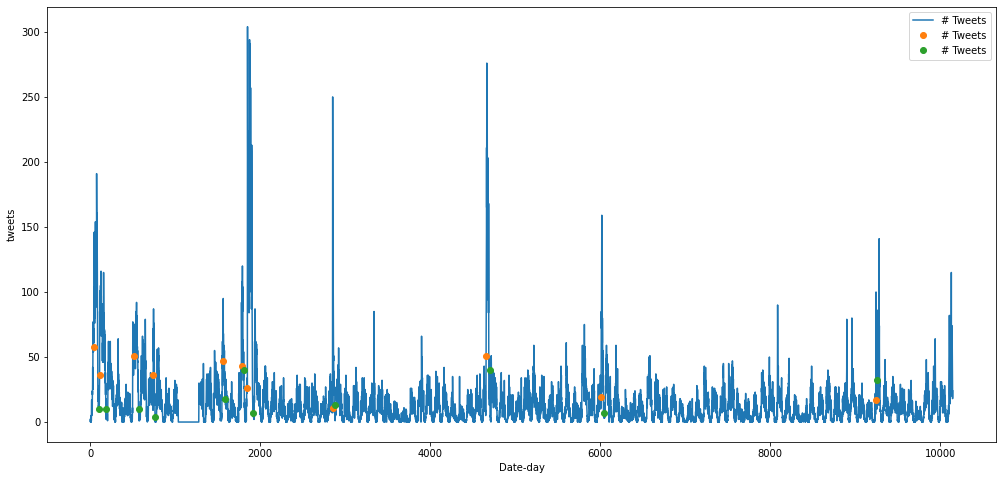

In [ ]:
plot_anomalies_alert(df_a2, inicio, fin)